<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: House Sale Price Predictor

## Problem Statement

The founder of a start-up company PropTechies highlighted that valuable time was lost between quotation queries and reply. The main reason was that the realtor have to be physically onsite for quotation. Therefore, to improve efficiency, we are task to provide a data driven solution by creating a Saleprice predictor. 

---
## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-import-&-cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling Process](#Modeling-Process)
- [Data Visualization](#Data-Visualization)
- [SalePrice Predictor](#The-Predictor)
- [Kaggle Competition Submission](#Export-to-CSV-for-kaggle-submission)
- [Conclusions and Recommendations](#Conclusion-and-Recommendation)
---

## Background

There are many parameters and conditions when naming the price of the house. Some examples are condition, size, finishing, age, location and so on.
It will take a team of of realtor to physically be present to check, reserch, cross referencing and finally quoting the selling price. This might translate to loss in manpower, time and ultimately loss of revenue for the company. A solution to increase efficiency and also cut down required man power is greatly needed.

### DataSet used
* [`train.csv`](./datasets/train.csv): Kaggle dataset for training ([*source*](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data))
* [`test.csv`](./datasets/test.csv): Kaggle dataset for scoring submissions ([*source*](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data))

## Data import & cleaning

*All libraries imported here*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,PowerTransformer, RobustScaler,Normalizer,OrdinalEncoder
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn import metrics 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression,SGDRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import shap

In [2]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

### Data cleaning

- *Step1- Loading dataset and checking dataframe structure*

In [3]:
train_df = pd.read_csv('./datasets/train.csv')
# load dataset and check data structure
print(train_df.shape)
print(train_df.info())
train_df.head()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  Hou

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


- *Step2- Duplicated Rows*

In [4]:
# Check for duplication
train_df[train_df.duplicated(keep='first')] 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


- *Step3- Nan values*

In [5]:
# check and sort na sum in descending order
is_na = train_df.isna().sum().sort_values(ascending = False) 
is_na = is_na[is_na >0]
is_na[is_na >0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

- Na for Nominal does not mean missing value. It represents absence of that particular feature.

In [6]:
# replace with string name for na
train_df = train_df.replace({
                                'Alley'   : {np.nan: 'Noalley'},
                                'Bsmt Exposure'    : {np.nan: 'Nobsmt'},
                                'BsmtFin Type 1' : {np.nan: 'Nobsmt'},
                                'BsmtFin Type 2' : {np.nan: 'Nobsmt'},
                                'Garage Type' : {np.nan: 'Nogarage'},
                                'Garage Finish' : {np.nan: 'Nogarage'},
                                'Misc Feature'  : {np.nan: 'None'},
                            }) 

In [7]:
# find columns for 'Cond' for condition
train_df.filter(like='Cond').columns 

Index(['Condition 1', 'Condition 2', 'Overall Cond', 'Exter Cond', 'Bsmt Cond',
       'Garage Cond'],
      dtype='object')

In [8]:
train_df = train_df.replace({
                            'Bsmt Cond'      : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                            'Garage Cond'    : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                            'Exter Cond'     : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                            })# replace with ordinal encoding

In [9]:
train_df.filter(like='Qu').columns # find columns for 'Qu' for quality

Index(['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Low Qual Fin SF',
       'Kitchen Qual', 'Fireplace Qu', 'Garage Qual'],
      dtype='object')

In [10]:
train_df = train_df.replace({
                                'Exter Qual'   : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Ex': 5, 'Po': 1 },
                                'Bsmt Qual'    : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                                'Kitchen Qual' : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Ex': 5, 'Po': 1 },
                                'Fireplace Qu' : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                                'Garage Qual'  : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 }
                            }) # replace with ordinal encoding

In [11]:
# find columns for 'QC' for quality and condition
train_df.filter(like='QC').columns 

Index(['Heating QC', 'Pool QC'], dtype='object')

In [12]:
train_df = train_df.replace({
                            'Heating QC'   : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                            'Pool QC'      : {'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan : 0, 'Ex': 5 },
                            }) # replace with ordinal encoding

In [13]:
train_df['Functional'].unique() 

array(['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2'],
      dtype=object)

In [14]:
train_df = train_df.replace({
                            'Functional'   : {'Sal' : 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7  },
                            })# replace with ordinal encoding for Functional

In [15]:
train_df = train_df.replace({
                            'Utilities'   : {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4 },
                            })# replace with ordinal encoding for Utilities

In [16]:
train_df = train_df.replace({
                            'Fence'   : {np.nan : 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4 },
                            })# replace with ordinal encoding for fence

In [17]:
train_df = train_df.replace({
                            'BsmtFinType1'   : {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6  },
                            })# replace with ordinal encoding for BsmtfinType1

- fill Na with 0 which also represent absence of that particulat feature

In [18]:
train_df.fillna(0,inplace =True)

## Exploratory Data Analysis

- *Step 1- Check correlation with y*

In [77]:
corr = train_df.corr(numeric_only=True)['SalePrice'][:-1]
corr_fil = corr[(corr >= 0.5) | (corr <= -0.5) ].sort_values(ascending =False)

iteritems is deprecated and will be removed in a future version. Use .items instead.


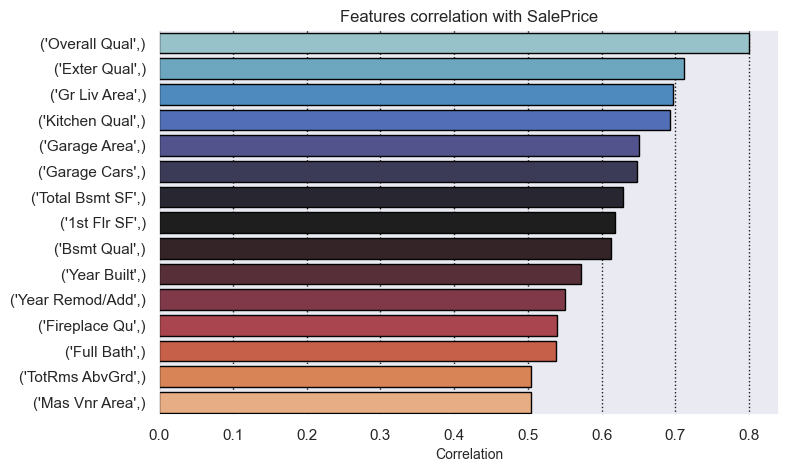

In [84]:
# correlation score for SalePrice with all columns
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
saleprice_corrdf = pd.DataFrame({'SalePriceCorr':corr_fil.tolist()}, index = [corr_fil.index])

plt.figure(figsize=(8, 5))
sns.set_style("darkgrid", {"grid.color": "0.1", "grid.linestyle": ":"})
g =sns.barplot(data=saleprice_corrdf.T,orient ='h',palette="icefire",linewidth=1, edgecolor=".01",)
plt.title("Features correlation with SalePrice")
g.set_xlabel("Correlation", fontsize = 10);

- *Step 2- check liner relationship with sale price for filtered features based on correlation

In [21]:
quality = train_df[corr_fil.filter(like='Qu').index.tolist() + ['SalePrice']]
area = train_df[corr_fil.filter(like='Area').index.tolist() + corr_fil.filter(like='SF').index.tolist() + ['SalePrice']]
rest = [feat for feat in corr_fil.index.tolist() if feat not in quality.columns.tolist() + area.columns.tolist()]
others = train_df[rest + ['SalePrice']]

- Quality vs Saleprice
    - there may have some linearity for quality features with saleprice

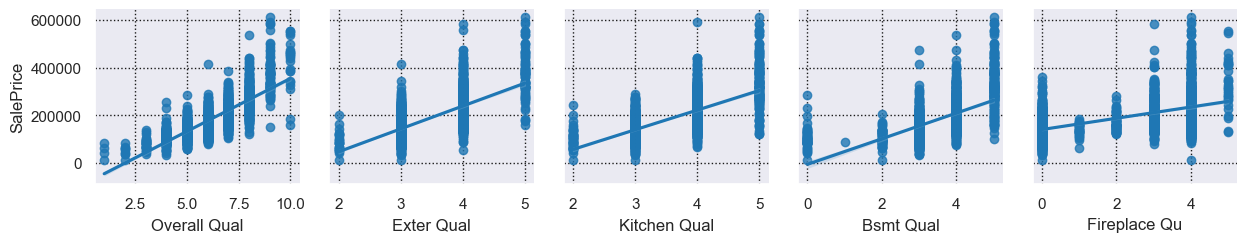

In [23]:
q = sns.PairGrid(quality, y_vars=['SalePrice'], x_vars=['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual','Fireplace Qu'])
q.map(sns.regplot);

- Area vs Saleprice
    - there may have some linearity for Area features with saleprice

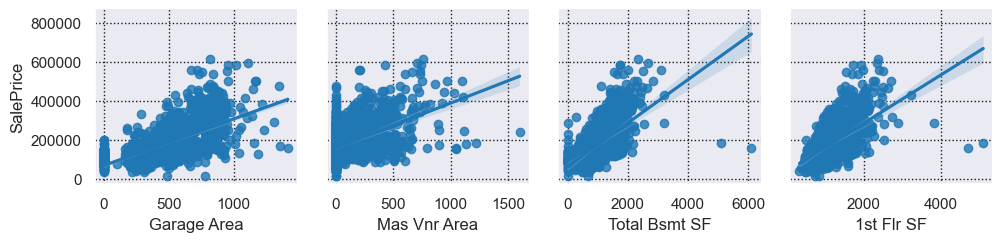

In [24]:
a = sns.PairGrid(area, y_vars=['SalePrice'], x_vars=['Garage Area', 'Mas Vnr Area', 'Total Bsmt SF','1st Flr SF'])
a.map(sns.regplot);

- Others vs Saleprice
    - there may have some linearity for the remaining features with saleprice

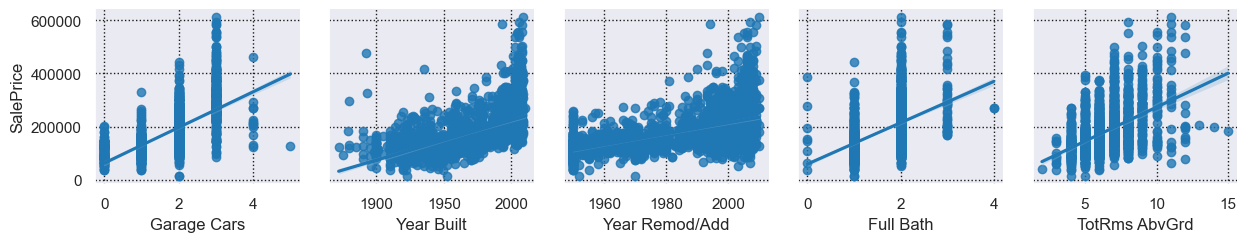

In [25]:
o = sns.PairGrid(others, y_vars=['SalePrice'], x_vars=['Garage Cars', 'Year Built', 'Year Remod/Add', 'Full Bath','TotRms AbvGrd'])
o.map(sns.regplot);

- *Step 3- check outliers*

In [26]:
def find_outliers(lis):
    outlier_col = []
    outlier_percent = []
    for item in lis:
        q1=train_df[item].quantile(0.25)
        q3=train_df[item].quantile(0.75)
        IQR=q3-q1
        if train_df[item].min() <= (q1-1.5*IQR) or train_df[item].max() >= (q3+1.5*IQR): 
            outlier_col.append(item)
            outlier_percent.append(((len(train_df[train_df[item] <= (q1-1.5*IQR)][item])+len(train_df[train_df[item] >= (q3+1.5*IQR)][item]))/len(train_df[item]))*100)
    outlier_df = pd.DataFrame(list(zip(outlier_col, outlier_percent)),columns =['Feature', 'Outlier %']) 
    return outlier_df

In [27]:
lis = train_df.select_dtypes(include=['int','float']).columns
outliers = find_outliers(lis)
ss_outlier = StandardScaler()
train_df_scal = ss_outlier.fit_transform(train_df[outliers.Feature]) # scaling was used only for visual ploting purposes
train_df_scal = pd.DataFrame(train_df_scal, columns = train_df[outliers.Feature].columns)
train_df_pt1 = train_df_scal.iloc[: , :11]
train_df_pt2= train_df_scal.iloc[: ,11:21]
train_df_pt3 = train_df_scal.iloc[: ,20:31]
train_df_pt4 = train_df_scal.iloc[: ,30:43]

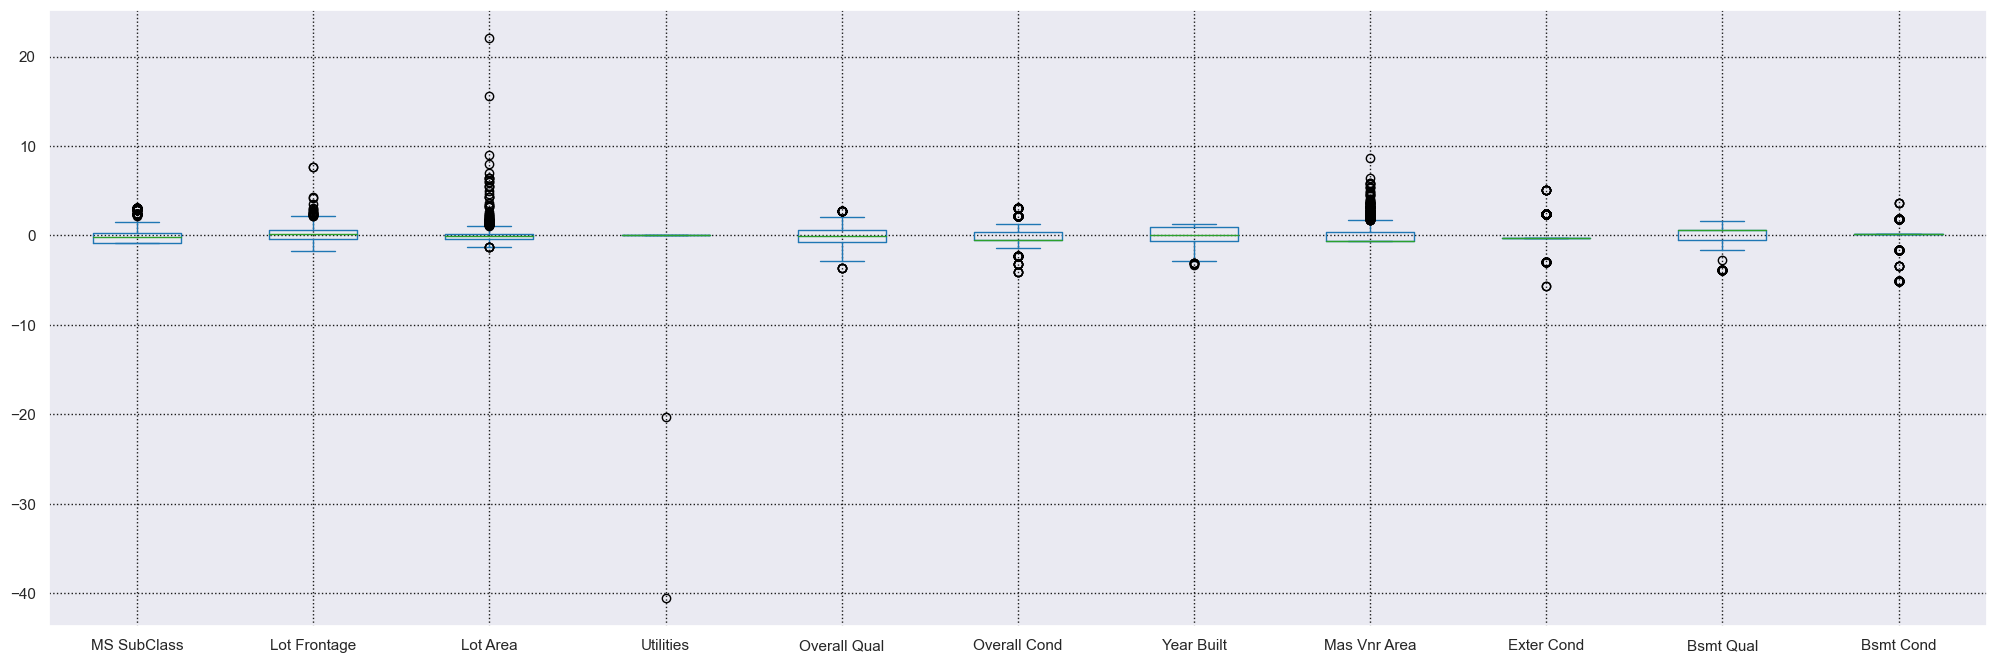

In [28]:
train_df_pt1.plot.box(figsize=(25, 8));

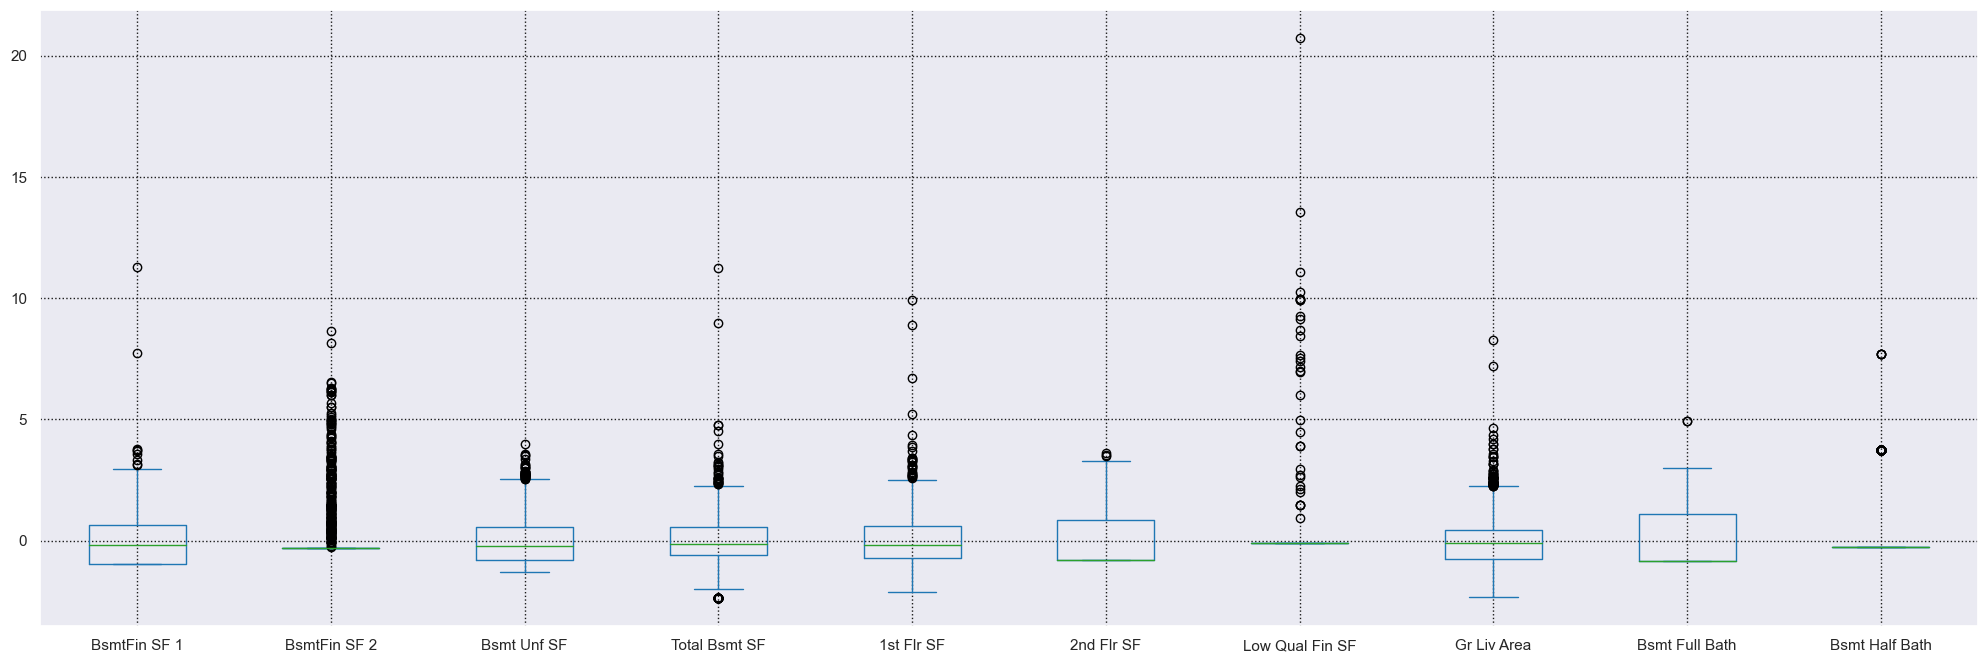

In [29]:
train_df_pt2.plot.box(figsize=(25, 8));

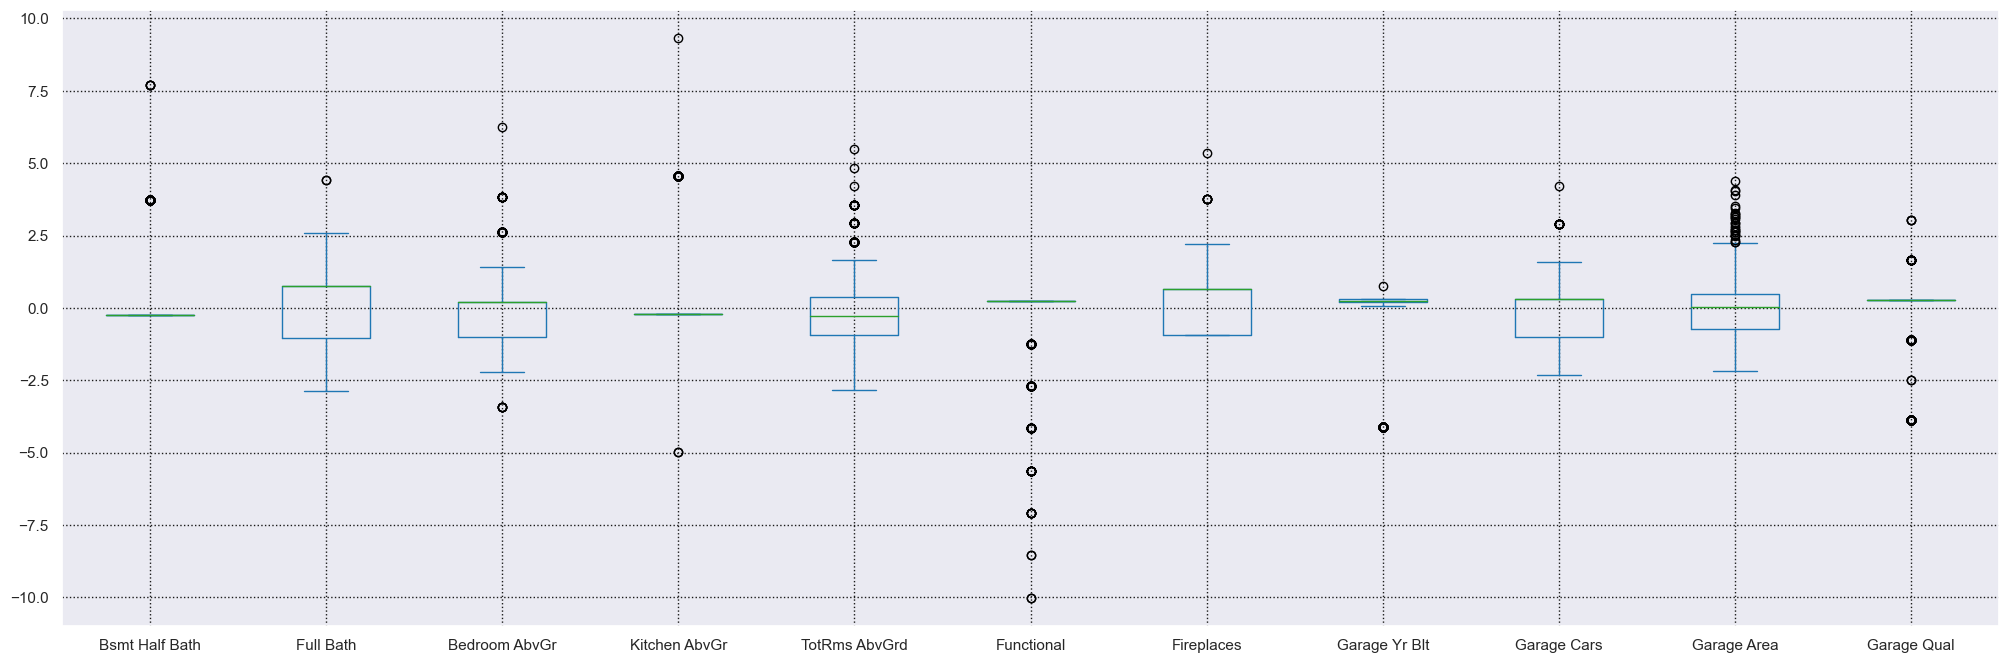

In [30]:
train_df_pt3.plot.box(figsize=(25, 8));

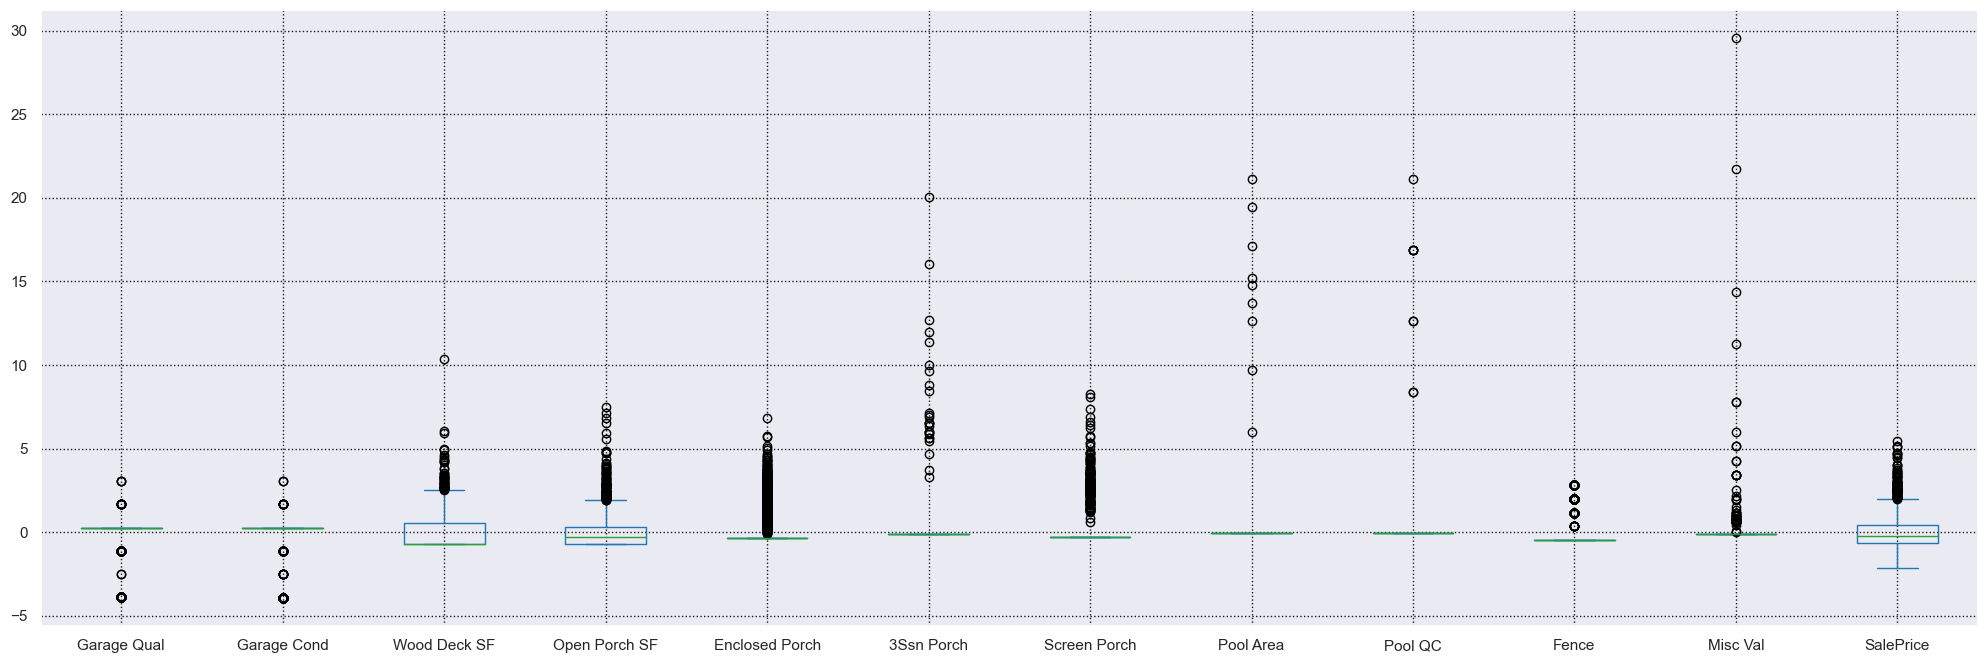

In [31]:
train_df_pt4.plot.box(figsize=(25, 8));

- Checking data shape after dropping rows for features with less than 10% outlier
    - Since after dropping rows with outliers resulted in more than 70% of the data.will be removing outliers from sale price

In [32]:
def del_outliers(lis_out):
    train_df_out = train_df
    for item in lis:
        q1=train_df[item].quantile(0.25)
        q3=train_df[item].quantile(0.75)
        IQR=q3-q1
        train_df_out = train_df_out[(train_df_out[item] >= (q1-1.5*IQR)) & (train_df_out[item] <= (q3+1.5*IQR))]
    return train_df_out 

In [33]:
# drop col with less than 10% outlier
lis_out = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','Bsmt Unf SF','Total Bsmt SF','1st Flr SF',
           '2nd Flr SF', 'Gr Liv Area','TotRms AbvGrd','Garage Area','Wood Deck SF','Open Porch SF','SalePrice']
train_df_out = del_outliers(lis_out)
train_df_out.shape # after removing all outliers we are only left with 584 observations

(584, 81)

In [34]:
def del_max_outliers(df, lis_out,num):
    tempdf = df
    for i in range(num):
        to_drop = []
        for item in lis_out:
            q1=tempdf[item].quantile(0.25)
            q3=tempdf[item].quantile(0.75)
            IQR=q3-q1
            df_max = q3 + 1.5*IQR
            item_max = tempdf[item].max()
            if item_max > df_max:
                to_drop.append(tempdf[item][tempdf[item] == item_max].index[0])
        tempdf = tempdf.drop(index=set(to_drop))        
    return tempdf

In [35]:
# only removing outliers from saleprice (top 10 outliers)
outlier_sel_feat = ['SalePrice']

In [36]:
new_train_df= del_max_outliers(train_df, outlier_sel_feat,10)

In [37]:
new_train_df.shape

(2041, 81)

## Feature engineering 

- check correlation between features
    - Features with high correrlation or VIF will be removed or feature engineered to reduce multicolinearity 

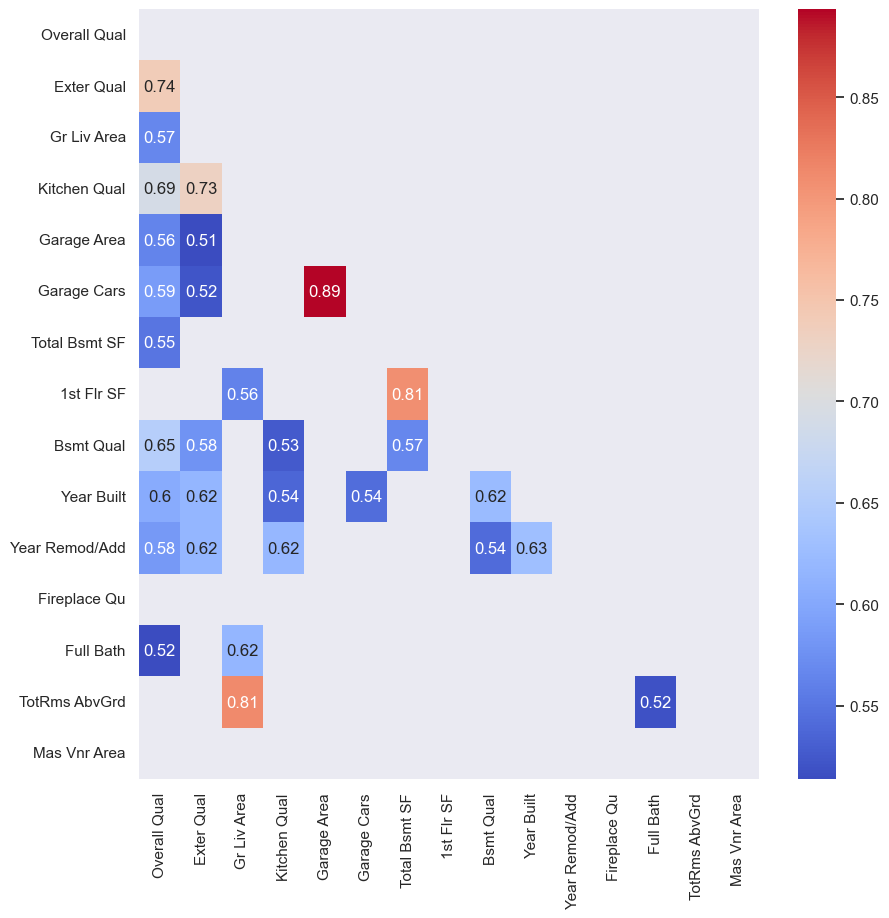

In [38]:
# heatmap for features with >0.5 and <-0.5 corr
plt.figure(figsize=(10,10))
corr_feat = train_df[corr_fil.index].corr()
corr_feat = corr_feat[(corr_feat >=0.5)| (corr_feat <= -0.5)]
mask = np.zeros_like(corr_feat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_feat, mask = mask, annot = True, cmap='coolwarm');

In [39]:
# declare X y for numericals numerical cols first
X_num = new_train_df[corr_feat.index]
y = new_train_df['SalePrice']

In [40]:
X_num.insert(0,'qual_avg',(X_num['Exter Qual'] + X_num['Overall Qual'] + X_num['Kitchen Qual'] + X_num['Bsmt Qual'] + X_num ['Fireplace Qu'])/5 , True)
X_num.insert(0,'renewed_years',(X_num['Year Remod/Add'] - X_num['Year Built']) , True)
X_num.insert(0,'ttl_area',(X_num['Gr Liv Area'] + X_num['Garage Area'] + X_num['Total Bsmt SF'] + X_num['1st Flr SF'] + X_num['Mas Vnr Area']) , True)
X_num.insert(0,'rooms_bath',(X_num['TotRms AbvGrd'] + X_num['Full Bath']) , True)
# X_num.insert(0,'area_per_rooms_bath',(X_num['ttl_area'] / X_num['rooms_bath']) , True)
to_drop = ['Exter Qual','Overall Qual','Kitchen Qual','Bsmt Qual','Year Remod/Add','Year Built','Fireplace Qu',
          'Gr Liv Area','Garage Area','Total Bsmt SF','1st Flr SF','Mas Vnr Area','Garage Cars','TotRms AbvGrd',
           'Full Bath']     
X_num = X_num.drop(to_drop, axis =1)

In [41]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(len(X_num.columns))]
print(vif_data)

         feature        VIF
0     rooms_bath  24.723961
1       ttl_area  26.895454
2  renewed_years   1.313317
3       qual_avg  26.625698


## Preprocessing for Modeling

In [42]:
X_obj = new_train_df.select_dtypes(include=['object'])
X_obj = pd.get_dummies(X_obj, drop_first=True)

In [43]:
X = pd.concat([X_num,X_obj],axis =1 )

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [45]:
Xtrain_obj =  Xtrain[X_obj.columns]
Xtest_obj =  Xtest[X_obj.columns]
Xtrain_num = Xtrain.drop (Xtrain_obj.columns,axis =1 )
Xtest_num = Xtest.drop (Xtest_obj.columns,axis =1 )

In [46]:
ss = StandardScaler()
Xtrain_num_scaled = ss.fit_transform(Xtrain_num)
Xtrain_num_scaled = pd.DataFrame(Xtrain_num_scaled, columns = Xtrain_num.columns,index = Xtrain_num.index)
Xtest_num_scaled = ss.transform(Xtest_num)
Xtest_num_scaled = pd.DataFrame(Xtest_num_scaled, columns = Xtest_num.columns,index = Xtest_num.index)

In [47]:
Xtrain_final = pd.concat([Xtrain_num_scaled,Xtrain_obj],axis =1)
Xtest_final = pd.concat([Xtest_num_scaled,Xtest_obj],axis =1)

## Modeling Process & Evaluation
- LinerRegression
- Regularization techniques
    - Ridge
    - Lasso
    - ENet
- Linear SVR
- SGDRegressor
- KNNRegressor
- DecisionTreeRegressor
- AdaBoostRegressor + Ridge

Model evaluation will be using RMSE as main metric score and R2 as Sub metric scores
- RMSE scores will get us the lowest Error
- R2 scores will judge if model is overfitted.

In [48]:
def get_scores(model,Xtrain, Xtest, ytrain, ytest):
    y_preds= model.predict(Xtest)
    y_preds = pd.DataFrame(y_preds, columns = ['SalePrice preds'])
    print(f'Test RMSE: {(metrics.mean_squared_error(ytest, y_preds))**0.5:0.0f}')
    print(f'Train R2: {model.score(Xtrain, ytrain):0.2f}')
    print(f'Test R2: {model.score(Xtest, ytest):0.2f}')

    plt.figure(figsize=(7, 5))
    sns.regplot(x=ytest, y=y_preds);
    plt.title("Prediction vs True values ");

### Baseline Reg Model 1 with Feature Engineered features
    Feature engineered columns 
    1) area_per_rooms_bath 
    2) renewed_years
    3) qual_avg
    
Metric Scoring:
- Test RMSE: 32419 
- Train R2: 0.79 
- Test R2: 0.82 
- Model not overfitted

In [49]:
# instantiate Pipeline and fitting
pipe1 = Pipeline([('lr', LinearRegression())]).fit(Xtrain_final[Xtrain_num.columns], ytrain)

Test RMSE: 32419
Train R2: 0.79
Test R2: 0.82


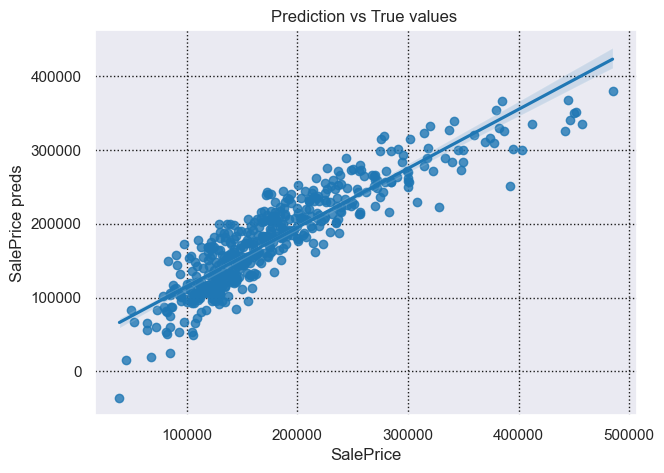

In [50]:
#Model Scores
get_scores(pipe1,Xtrain_final[Xtrain_num.columns],Xtest_final[Xtest_num.columns], ytrain, ytest)

### Reg Model 2 lr with nominal features
- Top 15 features from find best function

Metric Scoring:

- Test RMSE: 1869573890590931
- Train R2: 0.87
- Test R2: -615176890159517401088.00
- Model unable to predict

In [51]:
def find_best(lis):
    train_R2 = []
    test_R2 = []
    test_RMSE = []
    feature_lis = []
    delta_RMSE = []
    for feature in lis:
        X_obj_temp = Xtrain_final.filter(like=feature)
        X_temp = pd.concat([Xtrain_final[Xtrain_num.columns],X_obj_temp],axis =1)
        pipe_temp = Pipeline([('lr', LinearRegression())]).fit(X_temp, ytrain)
        train_R2.append((pipe_temp.score(X_temp, ytrain)).round(3))
        test_R2.append((pipe_temp.score(Xtest_final[X_temp.columns], ytest)).round(3))
        y_preds= pipe_temp.predict(Xtest_final[X_temp.columns])
        y_preds = pd.DataFrame(y_preds, columns = ['SalePrice preds'])
        test_RMSE.append((metrics.mean_squared_error(ytest, y_preds)**0.5).round(0))
        delta_RMSE.append(((32419 - (metrics.mean_absolute_error(ytest, y_preds)).round(0))/32419).round(2))
        feature_lis.append(feature)
        dic_temp = {'feature': feature_lis, 'train_R2': train_R2, 'test_R2': test_R2, 
                    'test_RMSE': test_RMSE, 'delta_RMSE':delta_RMSE}    
        results = pd.DataFrame(dic_temp)
    return results.sort_values('delta_RMSE',ascending = False)

In [52]:
lis = train_df.select_dtypes(include=['object']).columns
results = find_best(lis)

In [53]:
# get nominal features that improve scores
fil_nominal =  results[results['delta_RMSE'] > 0.25].head(15).feature.tolist()

In [54]:
X_features = Xtrain_final[Xtrain_num.columns].columns.tolist()
for nominal in fil_nominal:
        X_obj_nom_col = Xtrain_final.filter(like=nominal).columns.tolist()
        X_features = X_features + X_obj_nom_col

In [55]:
# instantiate Pipeline and fitting
pipe2 = Pipeline([('lr', LinearRegression())]).fit(Xtrain_final[X_features], ytrain)

Test RMSE: 1869573890590931
Train R2: 0.87
Test R2: -615176890159517401088.00


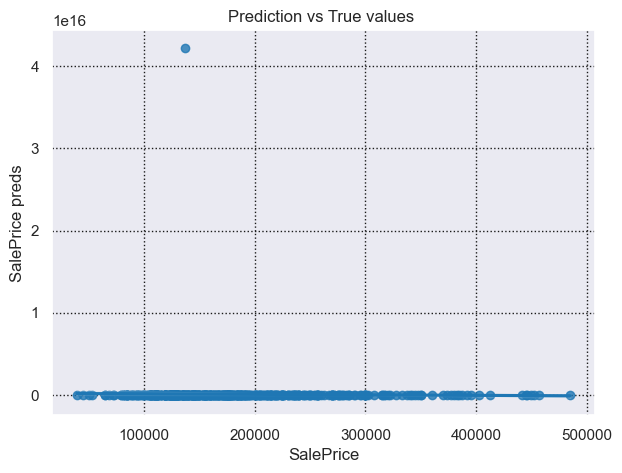

In [56]:
#Model Scores
get_scores(pipe2,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 3 (Regularization techniques)
- Top 15 features from find best function with regularizaion

Metric Scoring:
- Ridge
    - Test RMSE: 25699
    - Train R2: 0.87
    - Test R2: 0.88
    - Model not over fitted
- Lasso
    - Test RMSE: 25715
    - Train R2: 0.87
    - Test R2: 0.88
    - Model not over fitted

In [57]:
# instantiate Pipeline and fitting
pipe_rd = Pipeline([('rd', Ridge())])
pipe_las = Pipeline([('las', Lasso())])

In [58]:
pipe_rd_params = {'rd__alpha': np.linspace(0.1, 100,50),
                'rd__fit_intercept': [True,False],
                'rd__positive': [True,False]}

In [59]:
pipe_las_params = {'las__alpha': np.linspace(0.1, 100,50),
                    'las__selection': ['cyclic', 'random'],
                    'las__fit_intercept': [True,False],
                  'las__max_iter': [10000]}

In [60]:
pipe_rd_gridsearch = GridSearchCV(pipe_rd,
                             pipe_rd_params,
                             cv=5,
                             n_jobs=-1)

pipe_las_gridsearch = GridSearchCV(pipe_las,
                             pipe_las_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

In [61]:
pipe_rd_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_rd_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_rd_gridsearch.best_params_

{'rd__alpha': 2.138775510204082,
 'rd__fit_intercept': True,
 'rd__positive': False}

In [62]:
pipe_las_gridsearch.fit(Xtrain_final[X_features], ytrain)
las_results = pd.DataFrame(pipe_las_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_las_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'las__alpha': 30.68163265306123,
 'las__fit_intercept': True,
 'las__max_iter': 10000,
 'las__selection': 'random'}

Test RMSE: 25699
Train R2: 0.87
Test R2: 0.88


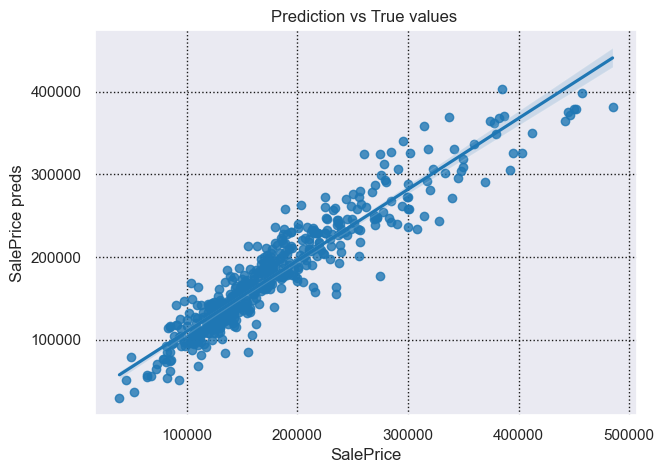

In [63]:
#Model Scores for Ridge
get_scores(pipe_rd_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

Test RMSE: 25736
Train R2: 0.87
Test R2: 0.88


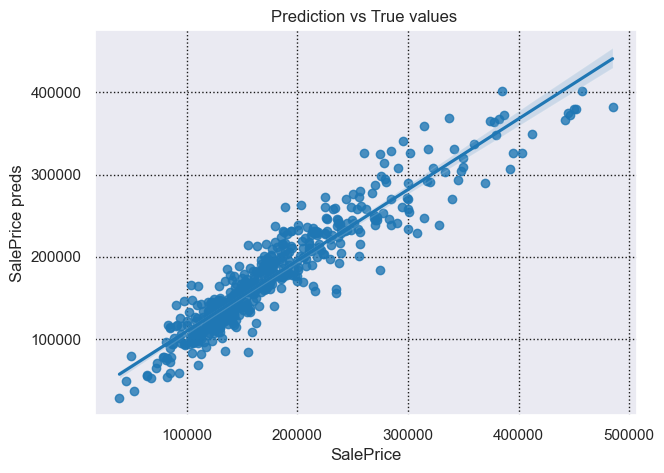

In [64]:
#Model Scores for Lasso
get_scores(pipe_las_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 4 LinearSVR

- Top 15 features from find best function

Metric Scoring:
- Test RMSE: 25748
- Train R2: 0.87
- Test R2: 0.88
- Model not over fitted

In [65]:
pipe_svm = Pipeline([('svm', LinearSVR())])

pipe_svm_params = {'svm__C':  np.linspace(0.1, 1,50),
                    'svm__loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
                  'svm__max_iter': [10000]}

pipe_svm_gridsearch = GridSearchCV(pipe_svm,
                             pipe_svm_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

pipe_svm_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_svm_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_svm_gridsearch.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'svm__C': 0.3755102040816327,
 'svm__loss': 'squared_epsilon_insensitive',
 'svm__max_iter': 10000}

Test RMSE: 25746
Train R2: 0.87
Test R2: 0.88


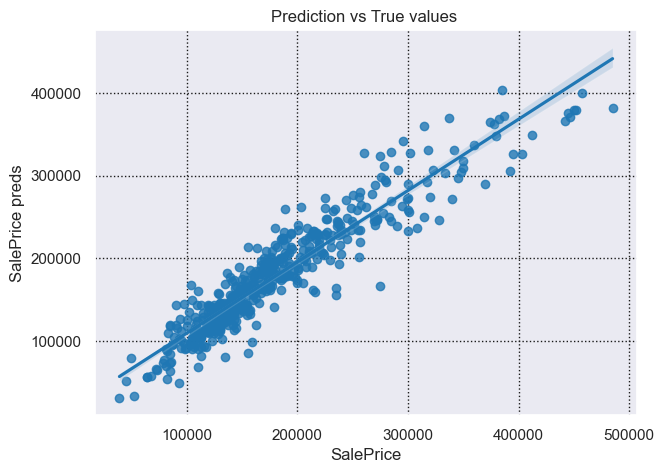

In [66]:
get_scores(pipe_svm_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 5 SGDRegressor

- Top 15 features from find best function

Metric Scoring:
- Test RMSE: 25964
- Train R2: 0.87
- Test R2: 0.88
- Model not over fitted

In [67]:
pipe_sgd = Pipeline([('sgd', SGDRegressor())])

pipe_sgd_params = { 'sgd__alpha': [0.0001,0.001,0.01,0.1,1,10],
                    'sgd__early_stopping': [True],
                    'sgd__l1_ratio': np.linspace(0.1,1,50),
                    'sgd__learning_rate': ['invscaling','adaptive','optimal'],
                    'sgd__penalty': ['l2', 'l1']}

pipe_sgd_gridsearch = GridSearchCV(pipe_sgd,
                             pipe_sgd_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

pipe_sgd_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_sgd_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_sgd_gridsearch.best_params_

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


{'sgd__alpha': 0.1,
 'sgd__early_stopping': True,
 'sgd__l1_ratio': 0.7612244897959184,
 'sgd__learning_rate': 'adaptive',
 'sgd__penalty': 'l1'}

Test RMSE: 26056
Train R2: 0.87
Test R2: 0.88


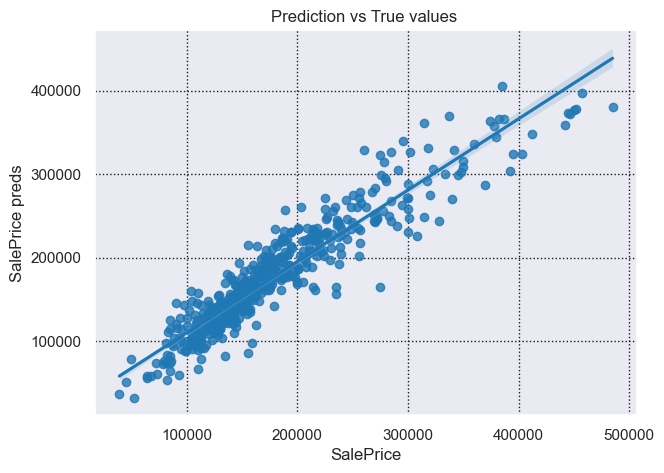

In [68]:
get_scores(pipe_sgd_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 6 KNeighborsRegressor

- Top 15 features from find best function

Metric Scoring:
- Test RMSE: 27974
- Train R2: 1.00
- Test R2: 0.86
- Model over fitted

In [69]:
pipe_knn = Pipeline([('knn', KNeighborsRegressor())])

pipe_knn_params = { 'knn__leaf_size': [10,30,60,100],
                    'knn__n_jobs': [-1],
                    'knn__n_neighbors': [1,2,4,8,16,32,64],
                    'knn__p': [1,2],
                    'knn__weights': ['uniform','distance']}

pipe_knn_gridsearch = GridSearchCV(pipe_knn,
                             pipe_knn_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

pipe_knn_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_knn_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_knn_gridsearch.best_params_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


{'knn__leaf_size': 10,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'distance'}

Test RMSE: 27974
Train R2: 1.00
Test R2: 0.86


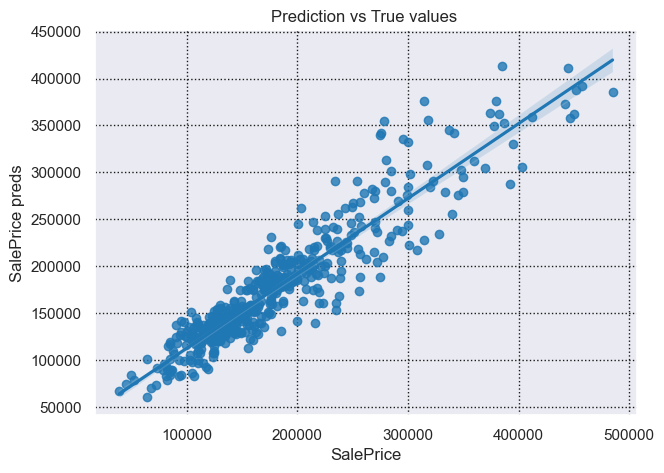

In [70]:
get_scores(pipe_knn_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 7 DecisionTreeRegressor

- Top 15 features from find best function

Metric Scoring:
- Test RMSE: 30849
- Train R2: 0.89
- Test R2: 0.83
- Model moderately over fitted

In [71]:
pipe_tree = Pipeline([('tree', DecisionTreeRegressor())])

pipe_tree_params = {'tree__max_depth': [None,50,100,200],
                    'tree__max_features': [None,50,100,200],
                    'tree__max_leaf_nodes': [None,50,100,200],
                    'tree__min_samples_leaf': [1,5,10,20],
                    'tree__min_samples_split': [2,5,10,20],
                    'tree__splitter': ['best','random']}

pipe_tree_gridsearch = GridSearchCV(pipe_tree,
                             pipe_tree_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

pipe_tree_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_tree_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_tree_gridsearch.best_params_

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


{'tree__max_depth': None,
 'tree__max_features': 100,
 'tree__max_leaf_nodes': 100,
 'tree__min_samples_leaf': 10,
 'tree__min_samples_split': 10,
 'tree__splitter': 'best'}

Test RMSE: 31441
Train R2: 0.90
Test R2: 0.83


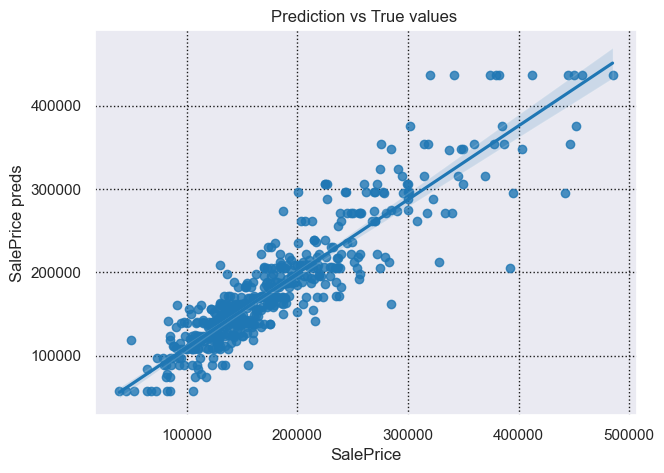

In [72]:
get_scores(pipe_tree_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

### Reg Model 8 AdaBoostRegressor + Ridge

- Top 15 features from find best function

Metric Scoring:
- Test RMSE: 25542
- Train R2: 0.87
- Test R2: 0.89
- Model not over fitted

In [73]:
rd = Ridge(alpha=2.138775510204082)

sgd = SGDRegressor(alpha = 0.1,
                   early_stopping = True,
                   l1_ratio = 0.43061224489795924,
                   learning_rate= 'adaptive',
                   penalty = 'l1')
pipe_ada = Pipeline([('ada', AdaBoostRegressor(base_estimator=rd))])

pipe_ada_params = {'ada__learning_rate': [1.0, 0.1, 0.01, 0.001],
                   'ada__loss': ['linear', 'square', 'exponential'],
                   'ada__n_estimators': [50, 100, 200]}

pipe_ada_gridsearch = GridSearchCV(pipe_ada,
                             pipe_ada_params,
                             cv=5,
                             verbose=3,
                             n_jobs=-1)

pipe_ada_gridsearch.fit(Xtrain_final[X_features], ytrain)
rd_results = pd.DataFrame(pipe_ada_gridsearch.cv_results_).sort_values('rank_test_score')
pipe_ada_gridsearch.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'ada__learning_rate': 0.001, 'ada__loss': 'square', 'ada__n_estimators': 50}

Test RMSE: 25523
Train R2: 0.87
Test R2: 0.89


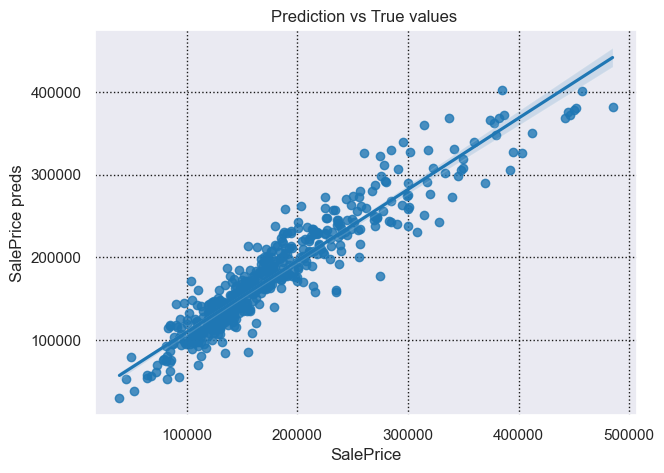

In [74]:
get_scores(pipe_ada_gridsearch,Xtrain_final[X_features],Xtest_final[X_features], ytrain, ytest)

## Data Visualization
### Best Model break down
- Best model: Reg Model 8 
- Features: 18 (3 numerical, 15 nominal)
- Test RMSE: 25542
- Train R2: 0.87
- Test R2: 0.89
- Top 5 features: qual_avg, ttl_area, Exterior2nd_VinylSd, rooms_bath, BsmtFin Type1_unf

In [75]:
bestmodel= pipe_ada_gridsearch.best_estimator_.named_steps.ada

In [85]:
explainer = shap.Explainer(bestmodel.predict, Xtrain_final[X_features])
shap_values = explainer(Xtrain_final[X_features])

Permutation explainer: 1531it [02:10, 10.95it/s]                                                                       


In [89]:
features = Xtrain_final[X_features].columns

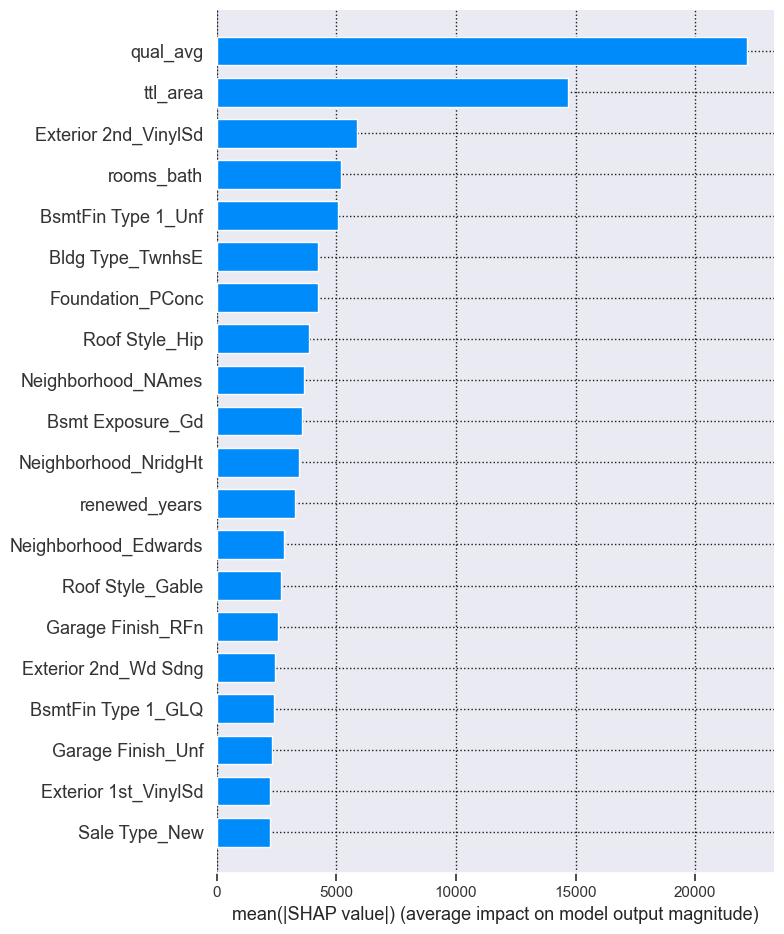

In [86]:
shap.summary_plot(shap_values,Xtrain_final[X_features], plot_type="bar")

In [108]:
y_preds = bestmodel.predict(Xtest_final[X_features])

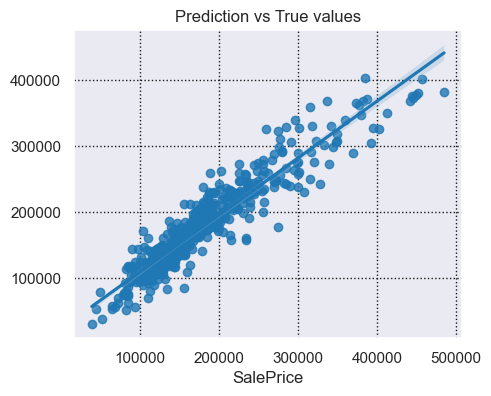

In [116]:
plt.figure(figsize=(5, 4))
sns.regplot(x=ytest, y=y_preds);
plt.title("Prediction vs True values");

In [110]:
resids = ytest - y_preds

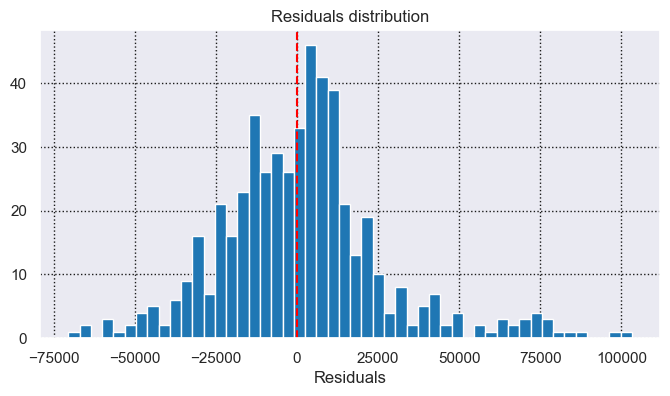

In [122]:
plt.figure(figsize=(8, 4))
b5 = plt.hist(resids, bins=50)
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.title("Residuals distribution")
plt.xlabel('Residuals');

- Residual distribution looks normally distributed

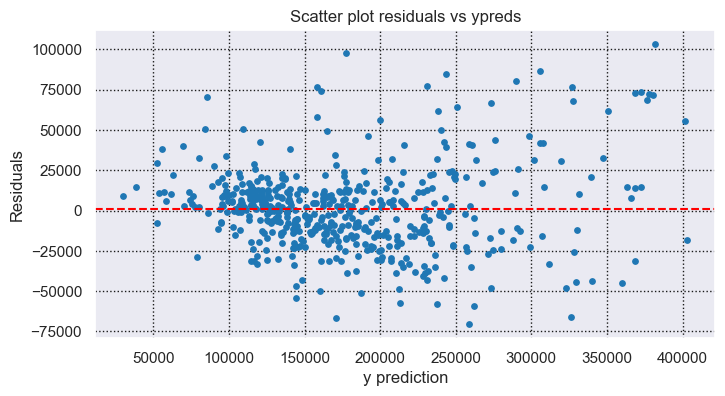

In [129]:
plt.figure(figsize=(8, 4))
b6 =plt.scatter(y_preds, resids, s=15)
plt.axhline(resids.median(), color="red",ls = '--')
plt.title("Scatter plot residuals vs ypreds")
plt.xlabel('y prediction')
plt.ylabel('Residuals');

- Residual mean is around zero

## Conclusion and Recommendation

### Conclusion

Model 8 was chosen as the final model.
1) Data massaging for numerical, ordinal & categorical features
2) Most Outliers were kept in the fitting except a few abnormal high points.

### Recommendation
The prediction is able to predict within a certain error from actual SalePrice. Higher Saleprice may vary more.

---
It is recommended to focus on the following parameters as the model is based on these features
1) Average Quality of the house
1) Total Area of the living space
3) Number of rooms & toilet
1) Neighborhood
1) BsmtFin Type 1
1) Bsmt Exposure
1) Foundation
1) MS Zoning
1) Roof Style
1) Paved Drive
1) Garage Finish
1) BsmtFin Type 2
1) Exterior 2nd
1) Exterior 1st
1) Land Contour
1) Condition 1
1) Bldg Type
1) Sale Type